# Decision Trees

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score


#Set figure size
sns.set(rc={'figure.figsize':(5,5)})

#Load data
df = pd.read_csv(os.path.join('data','data_filtered.csv'))
df2 = pd.read_csv(os.path.join('data','data_all.csv'))

#Enable CUDA
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

df

,sd,Q25,IQR,sp.ent,sfm,meanfun,mindom,dfrange,label
0,0.241585,0.455971,-0.601712,0.796058,0.925288,1.302489,-0.708404,-0.415794,1
1,-0.114476,-0.105393,0.401743,0.461699,-0.229014,-0.259737,-0.461523,0.412186,0
2,-1.284107,1.726540,-1.169425,-1.599113,-1.269425,1.315527,-0.461523,1.777355,1
3,1.089943,-0.391539,0.786946,0.578250,0.982092,-0.698228,-0.708404,-0.679948,0
4,0.231523,0.681061,-0.527833,0.508050,0.516462,1.167348,-0.708404,-1.343664,1
...,...,...,...,...,...,...,...,...,...
3163,1.087355,-0.480803,0.982768,1.385949,1.667369,-0.969765,-0.338082,-1.208257,0
3164,-1.471392,0.863030,-1.176833,-0.555301,-1.128432,0.530223,1.143207,-1.214917,1
3165,0.644400,-0.395149,0.953317,0.626947,0.305185,-0.983770,-0.708404,-0.688828,0
3166,1.557415,-0.558784,0.970942,1.076622,1.232644,-0.441604,-0.708404,-0.005133,0


In [57]:
feature_size = len(df.drop(['label'],axis=1).columns)
print(f'Number of Features: {feature_size}')

train_x, test_x, train_y, test_y = train_test_split(
    df.drop(['label'], axis=1), df['label'], test_size=0.2, random_state=42)

Number of Features: 8


In [3]:
def run(criterion: str = 'gini',   # Function to measure quality of split
        splitter: str = 'best',    # Choose best or random split
        max_depth:int=None,        # Max depth of tree
        max_features=None,         # Number of features to consider when looking at the best split
        min_samples_leaf: int = 1, # Minimum number of samples required to be at a leaf node
        show = True):
    
    dtree = DecisionTreeClassifier(criterion=criterion,
                                   splitter=splitter,
                                   max_depth=max_depth,
                                   min_samples_leaf=min_samples_leaf,
                                   max_features=max_features,
                                   random_state=1).fit(train_x,train_y)
    
    prediction = dtree.predict(test_x)

    accuracy = accuracy_score(prediction, test_y)
    precision = precision_score(prediction, test_y)
    recall = recall_score(prediction, test_y)
    f1 = f1_score(prediction, test_y)
    
    if not show:
        return [accuracy, precision, recall, f1]
    
    #Generate confusion matrix
    cm = confusion_matrix(test_y, prediction)
    count      = ["{0:0.0f}".format(v) for v in cm.flatten()]
    percentage = ["{0:.2%}".format(v) for v in cm.flatten()/np.sum(cm)]
    labels = np.asarray([f"{v1}\n{v2}" for v1, v2 in
              zip(count,percentage)]).reshape(2,2)
    sns.heatmap(cm,fmt='',annot=labels)
    
    # Print to standard output
    print('Accuracy:\t%.3f' % accuracy)
    print('Precision:\t%.3f' % precision)
    print('Recall:  \t%.3f' % recall)
    print('F1 Score:\t%.3f' % f1)
    
    return [accuracy,precision,recall,f1]
    

# Evaluation

## Run with default parameters

Accuracy:	0.973
Precision:	0.968
Recall:  	0.977
F1 Score:	0.973


[0.973186119873817, 0.9680511182108626, 0.9774193548387097, 0.9727126805778492]

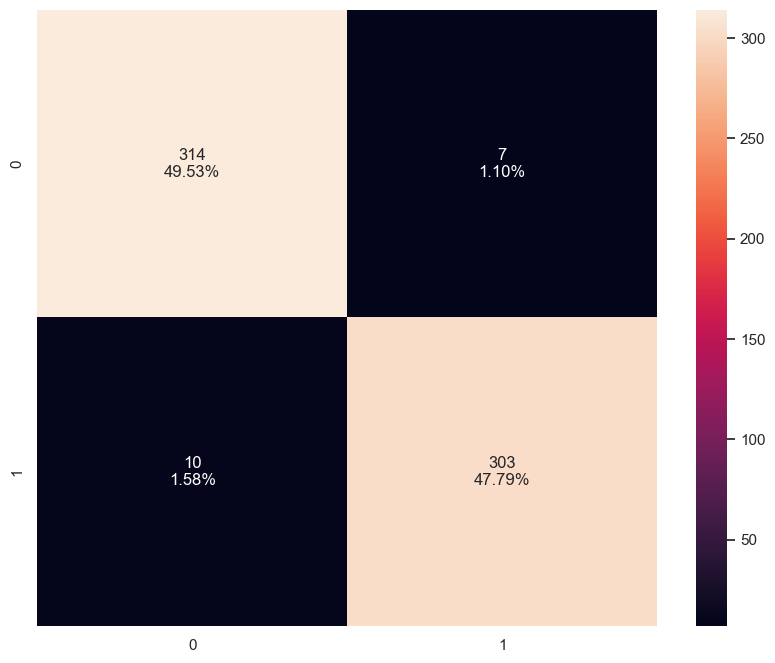

In [27]:
run()

## Selection of Split

The splitter may choose the best split or a random one.

Accuracy:	0.962
Precision:	0.962
Recall:  	0.962
F1 Score:	0.962


[0.9621451104100947,
 0.9616613418530351,
 0.9616613418530351,
 0.9616613418530351]

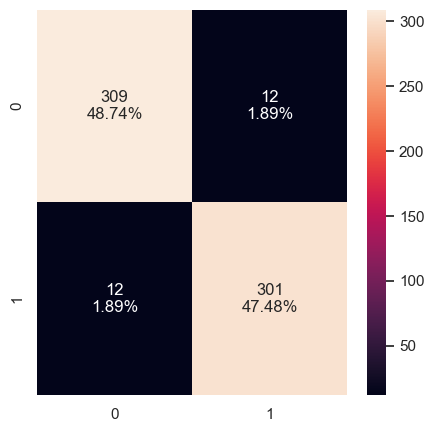

In [5]:
#Random split
run(splitter='random')

Accuracy:	0.973
Precision:	0.968
Recall:  	0.977
F1 Score:	0.973


[0.973186119873817, 0.9680511182108626, 0.9774193548387097, 0.9727126805778492]

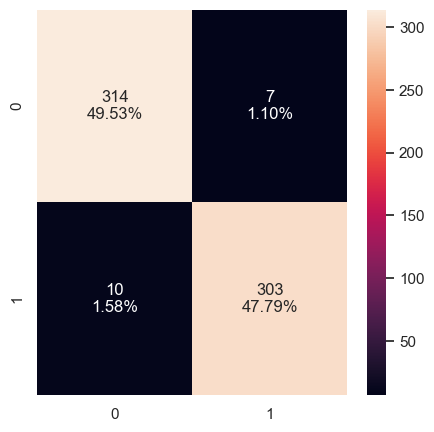

In [6]:
#Best split
run(splitter='best')

Random split has 96% accuracy, while Best split has 97%.

## Changing function to measure quality of split

Accuracy:	0.973
Precision:	0.968
Recall:  	0.977
F1 Score:	0.973


[0.973186119873817, 0.9680511182108626, 0.9774193548387097, 0.9727126805778492]

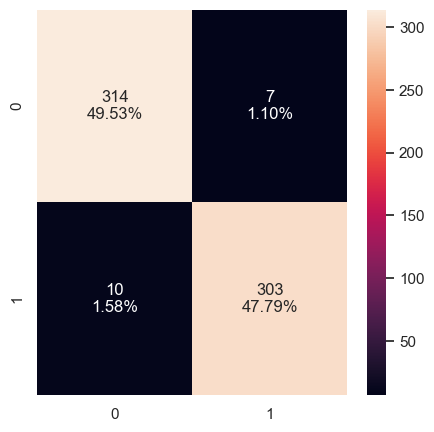

In [7]:
#Gini (default)
run(criterion='gini')

Accuracy:	0.967
Precision:	0.965
Recall:  	0.968
F1 Score:	0.966


[0.9668769716088328, 0.9648562300319489, 0.967948717948718, 0.9663999999999999]

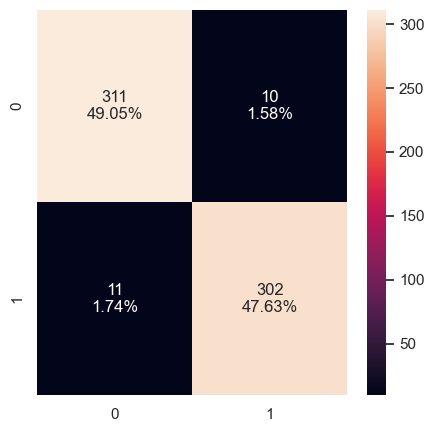

In [12]:
#Entropy
run(criterion='entropy')

Using the Gini Impurity gives a slightly better accuracy.

## Varying the maximum depth of a tree. <code>default=2</code>
Default length is until all leaves are pure or <a  href="https://scikit-learn.org/0.24/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier">until all leaves contain less than min_samples_split samples</a>

In [28]:
data = []
for d in np.arange(1,21):
    
    a,p,r,f = run(max_depth=d, show=False)
    
    #Tally metrics
    data.append([d,a,p,r,f])

metrics_df = pd.DataFrame(data,columns=['Max Depth','Accuracy','Prediction','Recall','F1 Score'])

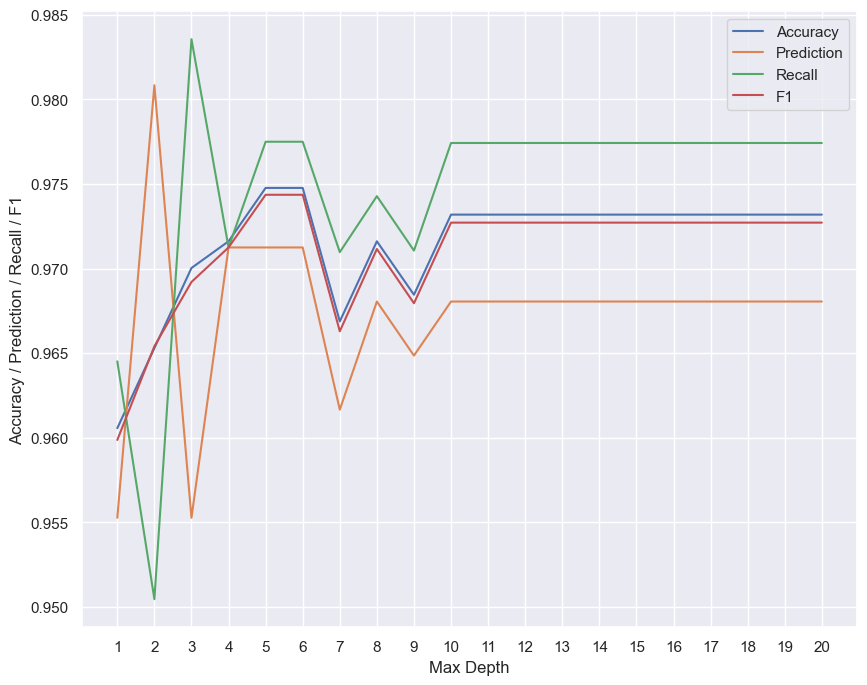

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
fig,ax = plt.subplots(1,1)

sns.lineplot(data=metrics_df, x='Max Depth',y='Accuracy', ax=ax)
sns.lineplot(data=metrics_df, x='Max Depth',y='Prediction', ax=ax)
sns.lineplot(data=metrics_df, x='Max Depth',y='Recall', ax=ax)
sns.lineplot(data=metrics_df, x='Max Depth',y='F1 Score', ax=ax)

ax.set_ylabel("Accuracy / Prediction / Recall / F1")
ax.legend(["Accuracy","Prediction","Recall","F1"])
ax.set_xticks(range(1,21))
plt.show()

The best maximum depth is 5,6 because that is when all metrics are all simultaneously at their highest.

Accuracy:	0.973
Precision:	0.968
Recall:  	0.977
F1 Score:	0.973


[0.973186119873817, 0.9680511182108626, 0.9774193548387097, 0.9727126805778492]

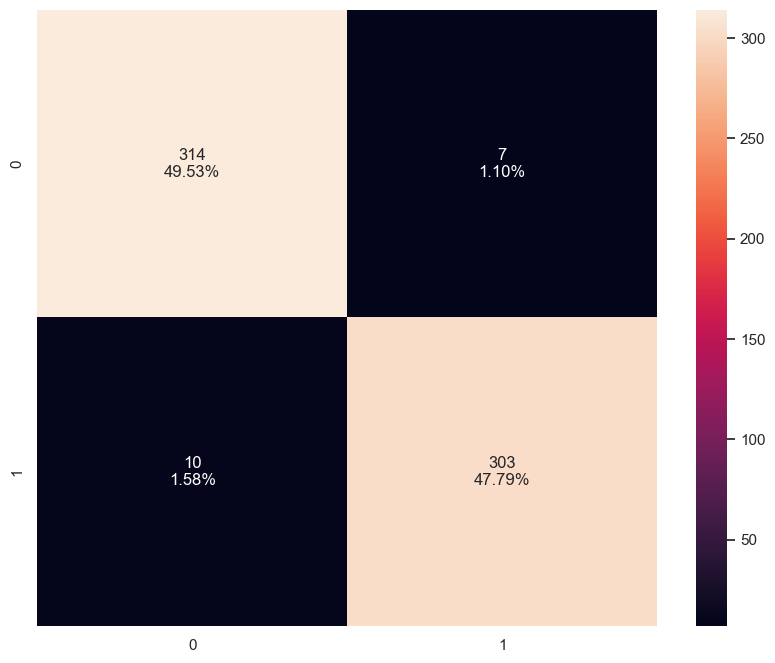

In [32]:
#10 females misclassifed as males.
run()

Accuracy:	0.975
Precision:	0.971
Recall:  	0.977
F1 Score:	0.974


[0.9747634069400631, 0.9712460063897763, 0.977491961414791, 0.9743589743589743]

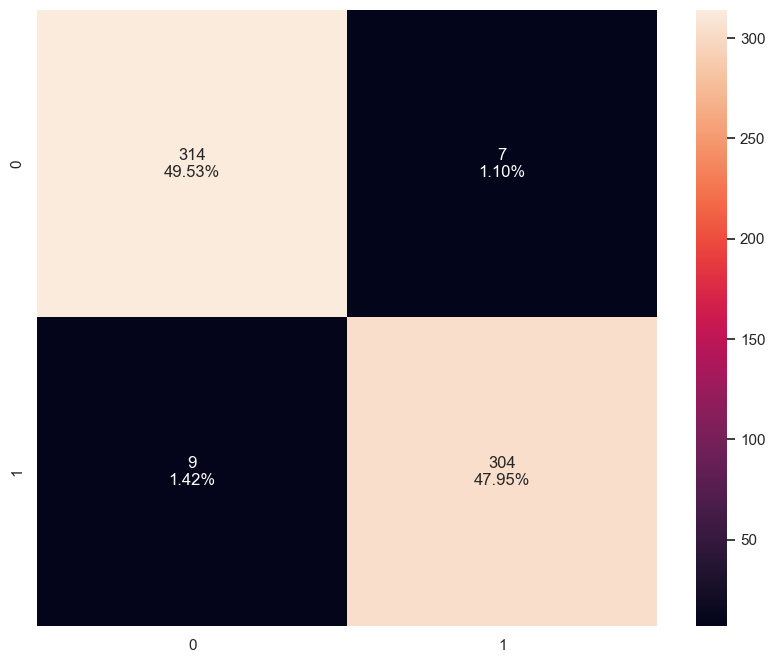

In [33]:
#Max Depth=5 allows the model to not misclassify a female for a male.
run(max_depth=5) 

## Varying the minimum number of samples required to be at a leaf node. <code>default=1</code>

In [50]:
data = []
for s in np.arange(1,50):   

    a,p,r,f = run(min_samples_leaf=s, show=False)
    
    #Tally metrics
    data.append([s,a,p,r,f])

metrics_df = pd.DataFrame(data,columns=['Min Samples','Accuracy','Prediction','Recall','F1 Score'])

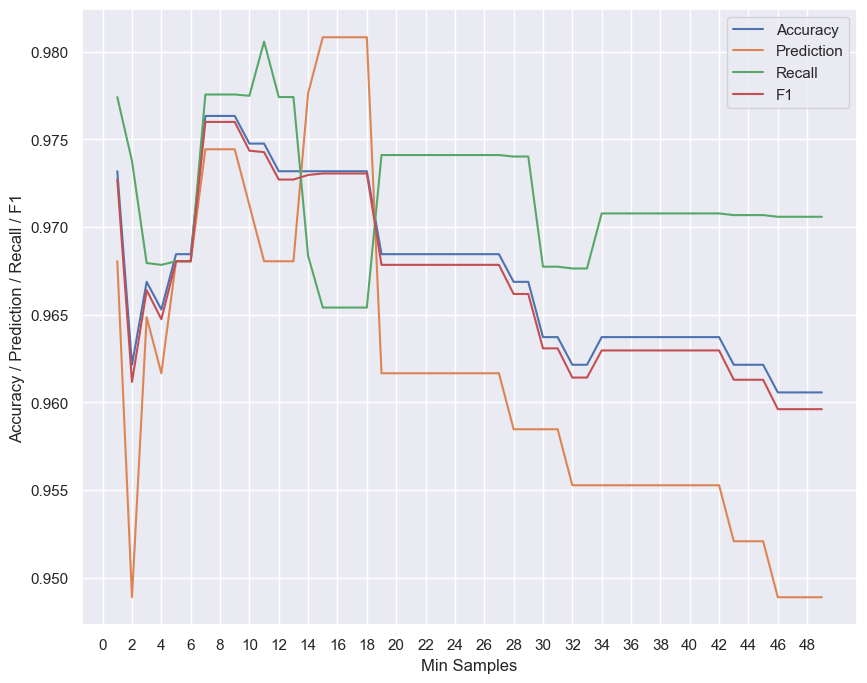

In [54]:
sns.set(rc={'figure.figsize':(10,8)})
fig,ax = plt.subplots(1,1)

sns.lineplot(data=metrics_df, x='Min Samples',y='Accuracy', ax=ax)
sns.lineplot(data=metrics_df, x='Min Samples',y='Prediction', ax=ax)
sns.lineplot(data=metrics_df, x='Min Samples',y='Recall', ax=ax)
sns.lineplot(data=metrics_df, x='Min Samples',y='F1 Score', ax=ax)

ax.set_ylabel("Accuracy / Prediction / Recall / F1")
ax.legend(["Accuracy","Prediction","Recall","F1"])
ax.set_xticks(range(0,50,2))
plt.show()

When <code>min_samples_leaf=8</code> all metrics are all simultaneously high.

# Conclusion
Combining all of the different metrics together, the best configuration of Decision Trees is as follows:

Accuracy:	0.976
Precision:	0.974
Recall:  	0.978
F1 Score:	0.976


[0.9763406940063092, 0.9744408945686901, 0.9775641025641025, 0.976]

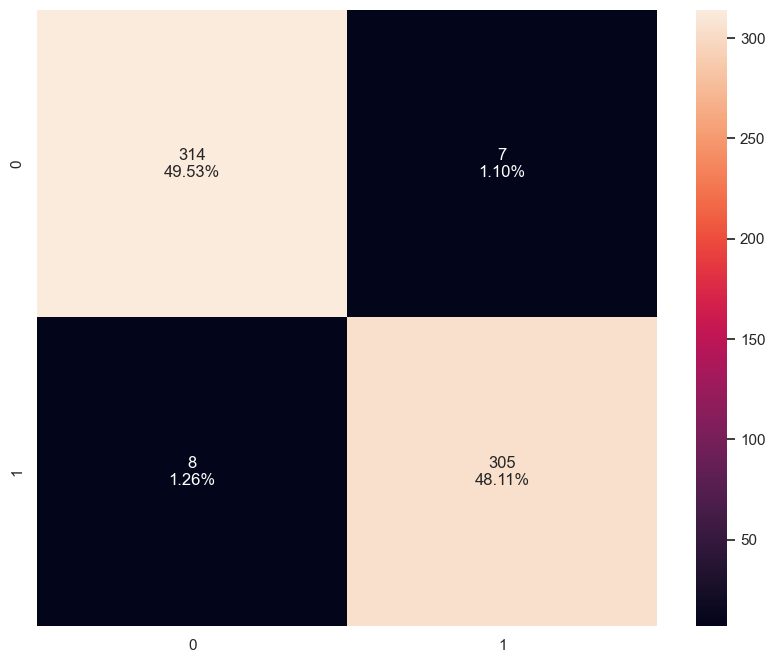

In [55]:
#Only 15 out of 634 are misclassifications
run(max_depth=5,  
   min_samples_leaf=8)